# 1-1 CCTV 현황과 인구 데이터

- 사용 Data
- CCTV_in_Seoul.csv, 서울시 자치구 연도별 cctv 설치 data
- population_in_Seoul.xls, 서울시 인구 통계 data

# 1-2 텍스트 파일과 엑셀 파일 읽기 - pandas

In [6]:
import pandas as pd

- pandas 모듈을 불러온다.

In [7]:
CCTV_Seoul = pd.read_csv('../data/CCTV_in_Seoul.csv', encoding='utf-8') # csv파일 읽어오기
CCTV_Seoul.head() # 5줄만 출력

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
CCTV_Seoul.columns # columns이름 반환

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [9]:
CCTV_Seoul.columns[0] # 0번째 '기관명'만 출력

'기관명'

In [10]:
# 컬럼명 '기관' -> '구별' 로 바꿈 
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True) # inplace=True는 변수내용 갱신
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


- CCTV_in_Seoul.csv 파일을 읽어온 후 첫번째 컬럼명인 '기관명'을 rename해서 '구별'로 바꿔준다.

- rename함수 안의 inplace=True는 변수내용을 갱신하라는 의미이다.

In [11]:
pop_Seoul = pd.read_excel('../data/population_in_Seoul.xls', encoding='utf-8') # excel파일 읽어오기
pop_Seoul.head() # 6줄만 출력 

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [12]:
pop_Seoul = pd.read_excel('../data/population_in_Seoul.xls', 
                          header = 2,                  # 3번째 줄 부터 읽기
                          usecols = 'B, D, G, J, N',   # 해당 열만 읽기
                          encoding='utf-8') 
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
# 컬럼명 '자치구' -> '구별' 로, '계' -> '인구수', '계1' -> '한국인' 등 으로 바꿈 
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)  
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


- population_in_Seoul.xls 파일을 읽어오면서 header = 2라는 옵션을 걸어 B, D, G, J, N 열만 읽도록 옵션을 준다.

- rename함수를 사용하여 컬럼명을 모호한 '계' 라는 컬렴명에서 '한국인' 또는 '외국인' 컬렴명으로 바꿔서 보기 편하도록 해준다.

- CCTV_Seoul 변수 -> '구별 CCTV 현황' 

-  pop_Seoul 변수 -> '구별 인구 현황'

# 1-3 pandas 기초

In [14]:
import pandas as pd
import numpy as np

In [15]:
s = pd.Series([1,3,5,np.nan,6,8])  # nan = not a number
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [16]:
dates = pd.date_range('20130101', periods=6) # 날짜형 데이터 함수 사용 
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 20130101는 기본날짜, periods=6을 주어 6일간으로 지정해준다.

In [17]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, # DataFrame유형의 데이터 만들기
                  columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,-1.151718,1.389671,0.745219,-0.179598
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-03,1.408797,-0.540333,0.947039,-1.088137
2013-01-04,0.400157,-1.796064,-0.646335,0.205134
2013-01-05,-1.194329,2.400090,1.755460,0.680678
2013-01-06,0.053616,0.546149,-0.513787,-0.093861


- DataFrame유형의 데이터를 만든다.
- 6행4열의 random변수를 생성하고,
- 컬럼은 'A','B','C','D'로 지정해준 후 index명령으로 dates변수의 데이터를 지정해준다.

In [18]:
df.index # 인덱스 확인

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns # 컬럼 확인

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values # 값 확인

array([[-1.1517175 ,  1.38967132,  0.7452192 , -0.17959775],
       [ 0.82951661,  0.7576613 ,  0.02028329,  0.87807237],
       [ 1.40879714, -0.54033346,  0.94703854, -1.08813695],
       [ 0.40015701, -1.79606389, -0.6463345 ,  0.20513428],
       [-1.19432934,  2.40009035,  1.75545957,  0.6806778 ],
       [ 0.05361605,  0.54614865, -0.51378667, -0.0938612 ]])

- values는 2차원 numpy의 array형태로 값을 얻을 수 있다.

In [21]:
df.info() # 개요확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [22]:
df.describe() # 통계적 개요 확인

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.057673,0.459529,0.384647,0.067048
std,1.055341,1.470697,0.930407,0.703498
min,-1.194329,-1.796064,-0.646335,-1.088137
25%,-0.850384,-0.268713,-0.380269,-0.158164
50%,0.226887,0.651905,0.382751,0.055637
75%,0.722177,1.231669,0.896584,0.561792
max,1.408797,2.400090,1.755460,0.878072


- describe()명령을 사용하면 통계적개요를 확인할 수 있다.
- count(개수), mean(평균), min(최솟값), max(최댓값), 1/4지점, 표준편차 까지 한 번에 알 수 있다.
- values가 숫자가 아닌 문자형태여도 그에 맞는 개요로 나타난다.

In [23]:
df.sort_values(by='B', ascending=False) # 정렬, by로 지정된 컬럼을 정렬시킨다, ascending=False는 내림차순

,A,B,C,D
2013-01-05,-1.194329,2.400090,1.755460,0.680678
2013-01-01,-1.151718,1.389671,0.745219,-0.179598
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-06,0.053616,0.546149,-0.513787,-0.093861
2013-01-03,1.408797,-0.540333,0.947039,-1.088137
2013-01-04,0.400157,-1.796064,-0.646335,0.205134


In [24]:
df['A'] # 해당컬럼만 나타내기

2013-01-01   -1.151718
2013-01-02    0.829517
2013-01-03    1.408797
2013-01-04    0.400157
2013-01-05   -1.194329
2013-01-06    0.053616
Freq: D, Name: A, dtype: float64

In [25]:
df[0:3] # 범위를 지정한 행만 나타내기

,A,B,C,D
2013-01-01,-1.151718,1.389671,0.745219,-0.179598
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-03,1.408797,-0.540333,0.947039,-1.088137


In [26]:
df['20130102':'20130104'] # 행 범위 지정

,A,B,C,D
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-03,1.408797,-0.540333,0.947039,-1.088137
2013-01-04,0.400157,-1.796064,-0.646335,0.205134


In [27]:
df.loc[dates[0]] # 슬라이싱

A   -1.151718
B    1.389671
C    0.745219
D   -0.179598
Name: 2013-01-01 00:00:00, dtype: float64

- loc는 location옵션, 위치 값 지정가능하다. (특정 날짜의 데이터만 나타내서 볼 수 있다.)

In [28]:
df.loc[:,['A','B']] # A, B열의 모든 행을 보고 싶을 때

,A,B
2013-01-01,-1.151718,1.389671
2013-01-02,0.829517,0.757661
2013-01-03,1.408797,-0.540333
2013-01-04,0.400157,-1.796064
2013-01-05,-1.194329,2.400090
2013-01-06,0.053616,0.546149


In [29]:
df.loc['20130102':'20130104',['A','B']] # 20130102 부터 20130104 까지의 데이터 중에서 A, B열의 데이터만 선택

,A,B
2013-01-02,0.829517,0.757661
2013-01-03,1.408797,-0.540333
2013-01-04,0.400157,-1.796064


In [30]:
df.loc['20130102',['A','B']] # # 20130102날짜의 A,B컬럼의 내용 확인

A    0.829517
B    0.757661
Name: 2013-01-02 00:00:00, dtype: float64

In [31]:
df.loc[dates[0],'A'] # 1번째 행의 데이터의 A컬럼만 확인

-1.1517175047674775

In [32]:
df.iloc[3] # 4번 행 출력

A    0.400157
B   -1.796064
C   -0.646335
D    0.205134
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5,0:2] # 3~4번 행(3번째부터 5번째 앞), 0~1번 열 출력

,A,B
2013-01-04,0.400157,-1.796064
2013-01-05,-1.194329,2.400090


In [34]:
df.iloc[[1,2,4],[0,2]] # 콤마로 범위 지정

,A,C
2013-01-02,0.829517,0.020283
2013-01-03,1.408797,0.947039
2013-01-05,-1.194329,1.755460


In [35]:
df.iloc[1:3,:] # 행은 범위지정, 열은 :(콜론)사용하여 전체 지정

,A,B,C,D
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-03,1.408797,-0.540333,0.947039,-1.088137


In [36]:
df.iloc[:,1:3] # 열은 범위지정, 행은 :(콜론)사용하여 전체 지정

,B,C
2013-01-01,1.389671,0.745219
2013-01-02,0.757661,0.020283
2013-01-03,-0.540333,0.947039
2013-01-04,-1.796064,-0.646335
2013-01-05,2.400090,1.755460
2013-01-06,0.546149,-0.513787


In [37]:
df[df.A > 0] # 컬럼 A에서 0보다 큰 행만 출력

,A,B,C,D
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-03,1.408797,-0.540333,0.947039,-1.088137
2013-01-04,0.400157,-1.796064,-0.646335,0.205134
2013-01-06,0.053616,0.546149,-0.513787,-0.093861


In [38]:
df[df > 0] # 데이터 전체에서 조건만족하지 않을 경우 NaN처리 된다.

,A,B,C,D
2013-01-01,NaN,1.389671,0.745219,NaN
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-03,1.408797,NaN,0.947039,NaN
2013-01-04,0.400157,NaN,NaN,0.205134
2013-01-05,NaN,2.400090,1.755460,0.680678
2013-01-06,0.053616,0.546149,NaN,NaN


In [39]:
df2 = df.copy() # 복사 

- = 기호로 복사할 경우 실제 데이터가 아닌 위치만 복사가 된다.

In [40]:
df2['E'] = ['one', 'one','two','three','four','three'] # 새로운 컬럼을 추가
df2

,A,B,C,D,E
2013-01-01,-1.151718,1.389671,0.745219,-0.179598,one
2013-01-02,0.829517,0.757661,0.020283,0.878072,one
2013-01-03,1.408797,-0.540333,0.947039,-1.088137,two
2013-01-04,0.400157,-1.796064,-0.646335,0.205134,three
2013-01-05,-1.194329,2.400090,1.755460,0.680678,four
2013-01-06,0.053616,0.546149,-0.513787,-0.093861,three


In [41]:
df2['E'].isin(['two','four']) # isin 명령은 해당 컬럼에 지정한 데이터가 있는지 조회할 때 사용한다. (True, False로 반환)

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [42]:
df2[df2['E'].isin(['two','four'])] # df2데이터에 해당 조건에 맞는 데이터가 있는지 출력

,A,B,C,D,E
2013-01-03,1.408797,-0.540333,0.947039,-1.088137,two
2013-01-05,-1.194329,2.400090,1.755460,0.680678,four


In [43]:
df 

,A,B,C,D
2013-01-01,-1.151718,1.389671,0.745219,-0.179598
2013-01-02,0.829517,0.757661,0.020283,0.878072
2013-01-03,1.408797,-0.540333,0.947039,-1.088137
2013-01-04,0.400157,-1.796064,-0.646335,0.205134
2013-01-05,-1.194329,2.400090,1.755460,0.680678
2013-01-06,0.053616,0.546149,-0.513787,-0.093861


- df2와는 다른 데이터이다.

In [44]:
df.apply(np.cumsum) # 누적합은 numpy의 cumsum을 사용한다.

,A,B,C,D
2013-01-01,-1.151718,1.389671,0.745219,-0.179598
2013-01-02,-0.322201,2.147333,0.765502,0.698475
2013-01-03,1.086596,1.606999,1.712541,-0.389662
2013-01-04,1.486753,-0.189065,1.066207,-0.184528
2013-01-05,0.292424,2.211026,2.821666,0.496150
2013-01-06,0.346040,2.757174,2.307879,0.402289


In [45]:
df.apply(lambda x: x.max() - x.min()) # one-line 함수인 lambda를 이용하여 최댓값과 최솟값의 차이(또는 거리)알 수 있다. 

A    2.603126
B    4.196154
C    2.401794
D    1.966209
dtype: float64

# 1-4 pandas를 이용한 CCTV와 인구 현황 데이터 파악하기

In [46]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [47]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5) # '소계'로 오름차순 정렬 -> CCTV의 전체개수 가장적은 구 5개

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [48]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5) # '소계'로 내림차순 정렬 -> CCTV의 전체개수 가장많은 구 5개

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [49]:
# '최근증가율'이라는 새로운 컬럼을 추가해준다.
# 최근 3년 CCTV증가율을 계산해준다.
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5) # '최근증가율'컬럼 내림차순 정렬 -> 증가율이 큰 구 5개

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## CCTV데이터 파악

- CCTV 개수가 가장 적은 구 5개 : '도봉구', '마포구', '송파구', '중랑구', '중구' 이다.
- CCTV 개수가 가장 많은 구 5개 : '강남구', '양천구', '서초구', '은평구', '용산구' 이다.

- 2014년 ~ 2016년 까지의 최근 3년 CCTV수를 더하고 2013년 이전의 CCTV수로 나눠서 최근 3년 CCTV증가율을 계산해준다.
- 최근 3년간 CCTV가 그 이전 대비 많이 증가한 구는 '종로구', '도봉구', '마포구', '노원구', '강동구' 이다.

In [50]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [51]:
pop_Seoul.drop([0], inplace=True) #  0번 행의 '합계'는 필요없기 때문에 지운다.
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [52]:
pop_Seoul['구별'].unique() # '구별'컬럼의 unique조사, 한 번 이상 나타난 데이터 확인가능하다.

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [53]:
pop_Seoul[pop_Seoul['구별'].isnull()] # NaN 데이터 추출

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [54]:
pop_Seoul.drop([26], inplace=True) # NaN있는 26번째 행 삭제
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [55]:
# '외국인비율'과 '고령자비율'을 구한다.
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100 
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


- NaN데이터가 들어있는 행과 필요없는 행을 drop 명령으로 제거해준다.
- 각 구별 전체 인구를 이용해서 구별 '외국인비율'과 '고령자비율'을 계산해준다.

In [56]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5) # '인구수'로 내림차순 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [57]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5) # '외국인'으로 내림차순 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [58]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5) # '외국인비율'로 내림차순 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [59]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5) # '고령자'로 내림차순 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [60]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5) # '고령자비율'로 내림차순 정렬

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 서울시 인구 현황 데이터 파악

- 인구 수가 많은 구 5개 : '송파구', '강서구', '강남구', '노원구', '관악구' 이다.

- 외국인 수가 많은 구 5개 : '영등포구', '구로구', '금천구', '관악구', '동대문구' 이다.
- 외국인 비율이 높은 구 5개 : '영등포구', '금천구', '구로구', '중구', '용산구' 이다.

- 고령자 수가 많은 구 5개 : '강서구', '송파구', '은평구', '노원구', '관악구' 이다.
- 고령자 비율이 높은 구 5개 : '강북구', '종로구', '중구', '용산구', '서대문구' 이다.

# 1-5 pandas를 이용한 두 DataFrame 병합하기

- 인구 대비 CCTV현황 알아보기

In [61]:
# 연습용 데이터를 3개 만든다.
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [62]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [63]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [64]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [65]:
result = pd.concat([df1, df2, df3]) # concat 명령으로 단순 열 방향으로 데이터를 합쳐준다.
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [66]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z']) # keys 옵션으로 구분해준다.
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [67]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [68]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [69]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

- key 지정된 구분은 다중 index가 되서 level을 형성한다. 

In [71]:
# 데이터를 새로 만든다.
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1) # axis=1옵션을 사용해 컬럼중심으로 데이터를 병합시킨다.

In [72]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [73]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [74]:
result # index기준으로 데이터가 병합되어서 값을 가질 수 없는 곳에 NaN이 저장된다.

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [75]:
result = pd.concat([df1, df4], axis=1, join='inner') # join='inner' 옵션을 사용해 공통된 index를 기준으로 데이터를 병합. (나머지는 버림)
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [76]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index]) # join_axes=[df1.index] 옵션을 사용해 df1 의 인덱스에 맞춰준다.
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [81]:
result = pd.concat([df1, df4], ignore_index=True) # ignore_index=True 옵션으로 기존의 index를 무시하고 새로운 index를 부여해준다.
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [78]:
# 연습용 데이터 2개를 만들어준다.
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [79]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [80]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [82]:
pd.merge(left, right, on='key') # 공통으로 들어있는 key를 기준으로 merge 명령에서 on 옵션으로 공통된 key를 합쳐준다.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [83]:
pd.merge(left, right, how='left', on='key') # how 옵션을 주어 한 쪽 데이터를 설정해준다. (데이터가 없을경우 NaN이 들어온다.)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [84]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [85]:
pd.merge(left, right, how='outer', on='key') # outer 옵션은 합집합 처럼 데이터 결과를 모두 가진다. (공통된 요소가 없을경우 NaN처리 된다.) 

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [86]:
pd.merge(left, right, how='inner', on='key') # outer의 반대인 inner 옵션은 교집합처럼 공통된 요소만 가진다.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 1-6 CCTV 데이터와인구 현황 데이터를 합치고 분석하기

In [87]:
# 결과 변수 생성
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별') # '구별'을 기준으로 두 데이터를 병합시킨다.
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [88]:
# 년도와 같은 필요없는 열은 삭제해준다.
# 열 삭제(del), 행 삭제(drop)
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [89]:
data_result.set_index('구별', inplace=True) # set_index 명령을 사용해 '구별'컬럼을 index로 지정해준다. (그래프 그릴 때 유리)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [90]:
np.corrcoef(data_result['고령자비율'],data_result['소계']) # '고령자비율'과 'CCTV 소계'의 상관계수를 확인한다. (약한 음의 상관관계)

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [91]:
np.corrcoef(data_result['외국인비율'],data_result['소계']) # '외국인비율'과 'CCTV 소계'의 상관계수를 확인한다. (큰 의미 없음)

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [92]:
np.corrcoef(data_result['인구수'],data_result['소계']) # '인구수'와 'CCTV 소계'의 상관계수를 확인한다. (약한 상관관계)

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

- 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 볼 수 있다.
- numpy의 corrcoef명령으로 상관계수를 확인할 수 있다.
- 예를 들어 상관계수의 절대값이 0.1 이하면 거의 무시, 0.3이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계라고 한다.

In [93]:
data_result.sort_values(by='소계', ascending=False).head(5) # '소계'컬럼을 내림차순으로 정렬 (CCTV가 많이 설치된 구 5개)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [94]:
data_result.sort_values(by='인구수', ascending=False).head(5) # '인구수'컬럼을 내림차순으로 정렬 (인구수가 많은 구 5개)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 1-7 그래프 그리기(시각화 도구) - matplotlib

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

- 그래프를 그리는 모듈은 matplotlib.pyplot이다.
- 결과를 세션에 나타나게 하는 설정은 %matplotlib inline 이다.

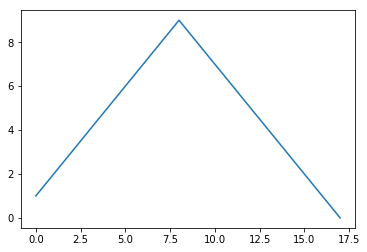

In [96]:
plt.figure() # 새로운 figure를 생성해준다.
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show() # 생성된 모든 figure를 보여준다.

In [97]:
import numpy as np

t = np.arange(0,12,0.01) # np.arange명령으로 0부터 12까지 0.01의 간격으로 데이터를 만든다. 

y = np.sin(t) # 사인함수(x축은 t에 저장된 0부터 12까지의 데이터이다. 결과는 y에 저장. 

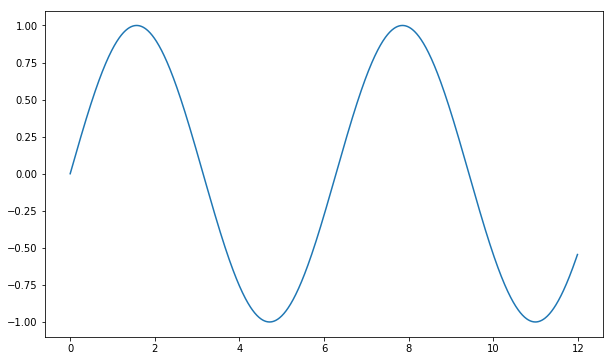

In [98]:
plt.figure(figsize=(10,6)) # 그래프의 가로세로 크기
plt.plot(t, y)
plt.show()

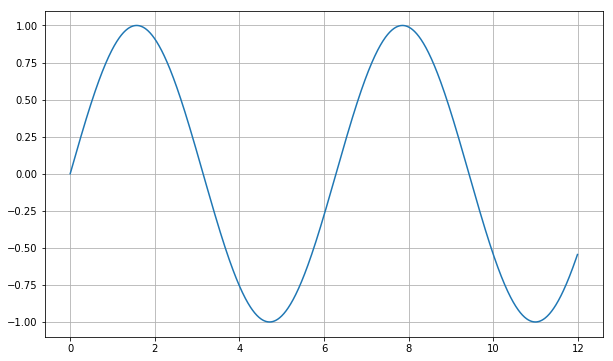

In [99]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.show()

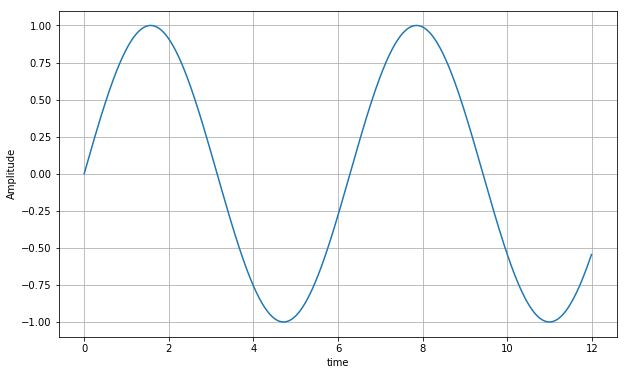

In [100]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

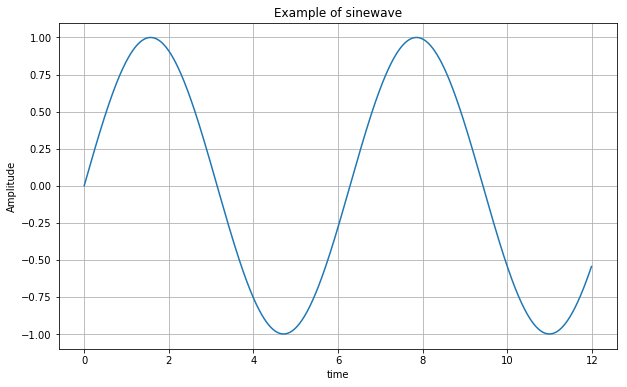

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave') # 타이틀 지정
plt.show()

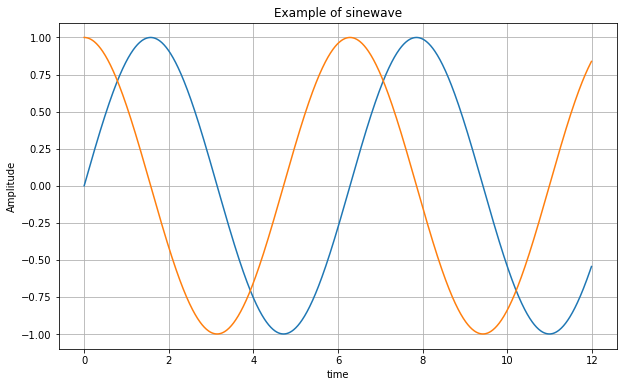

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t)) # 사인 함수
plt.plot(t, np.cos(t)) # 코사인 함수
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

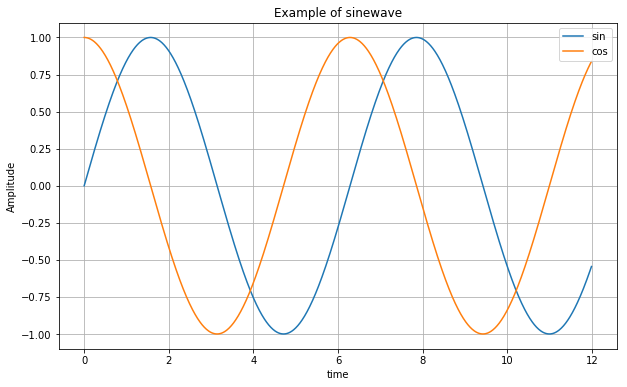

In [103]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin') # 범례지정
plt.plot(t, np.cos(t), label='cos') # 범례지정
plt.grid()
plt.legend() # 범례를 추가 plot 그릴 때 label 옵션으로 준다.
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

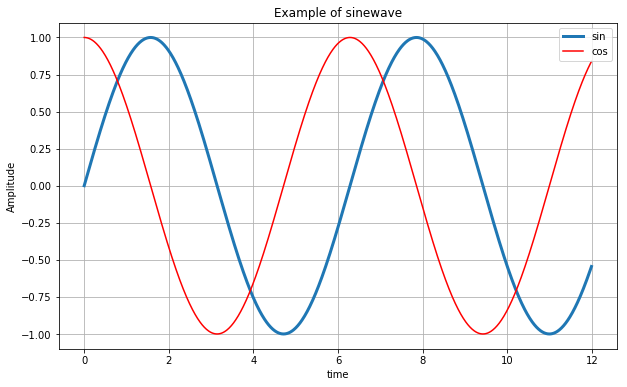

In [104]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin') # lw 옵션은 선의 굵기 지정
plt.plot(t, np.cos(t), 'r', label='cos') # color옵션은 색 지정
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

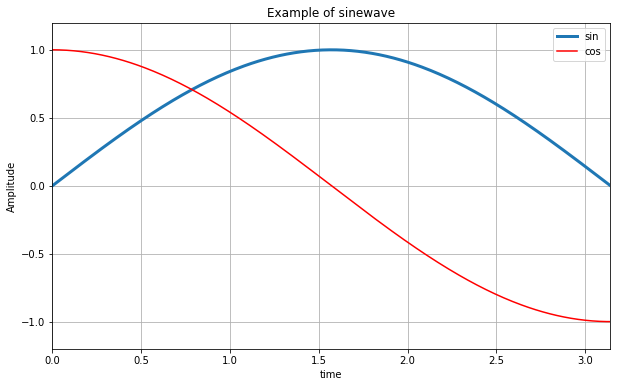

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2) # 그림의 범위를 수동으로 지정, y축(최소값, 최대값)
plt.xlim(0, np.pi)  # 그림의 범위를 수동으로 지정, x축(최소값, 최대값)
plt.show()

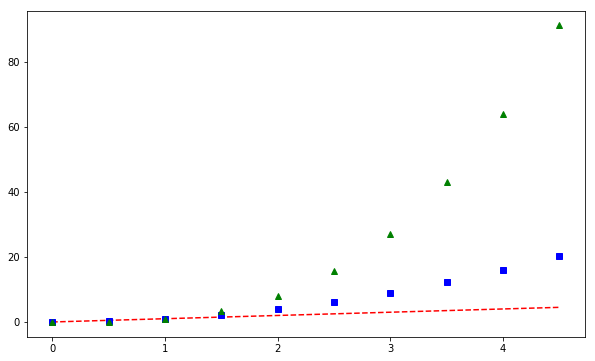

In [106]:
t = np.arange(0, 5, 0.5)  # 0부터 5까지 0.5 간격의 데이터

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')   # x=t,y=t 일 때,  red 점선 그래프)
plt.plot(t, t**2, 'bs') # x=t,y=t2 일 때,  blue squere dot(네모난 점) 그래프
plt.plot(t, t**3, 'g^') # x=t,y=t3 일 때,  green 세모 점 그래프
# plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') 같이 사용 가능하다.

plt.show()

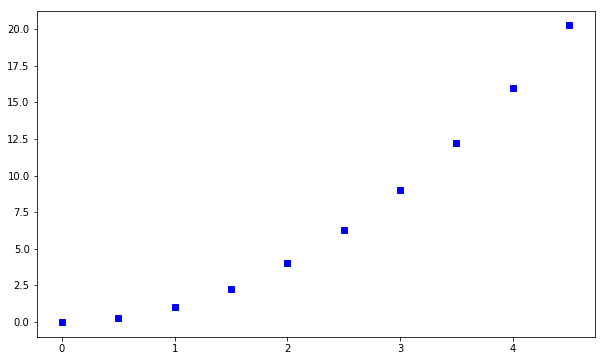

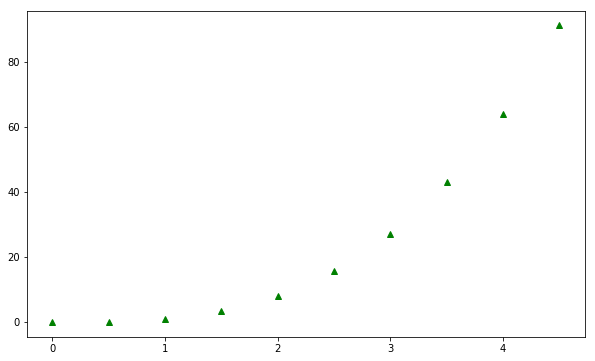

In [107]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

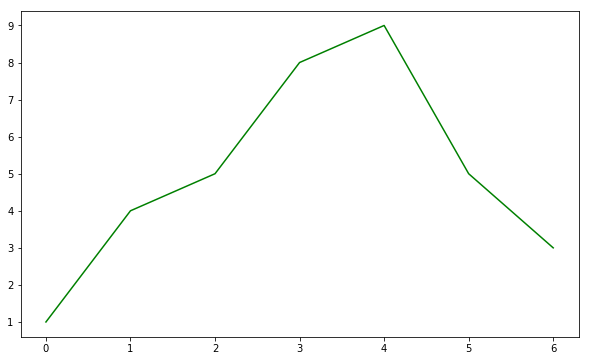

In [108]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

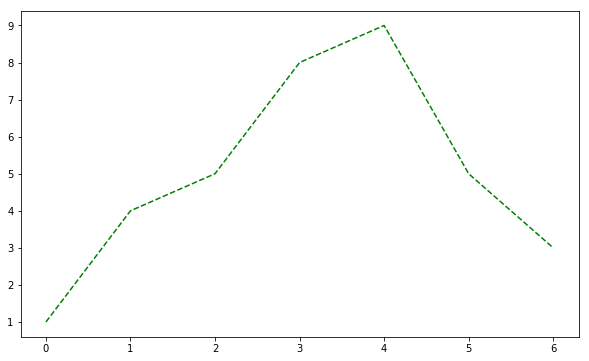

In [109]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed') # 선 스타일 지정 
plt.show()

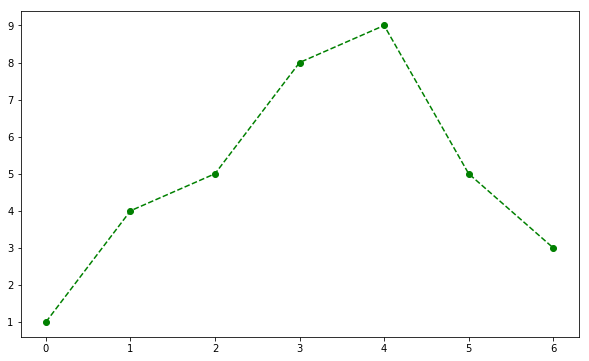

In [110]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o') # 데이터가 존재하는곳에 마킹
plt.show()

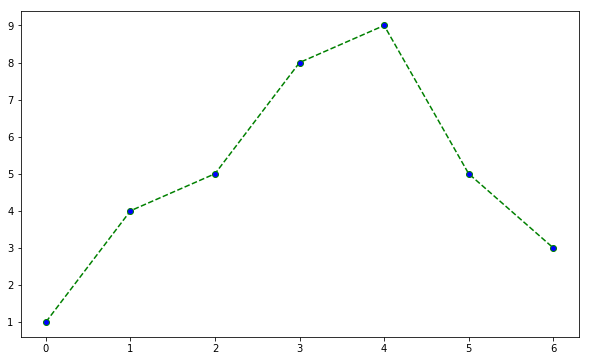

In [111]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue') # 마커 생상 지정
plt.show()

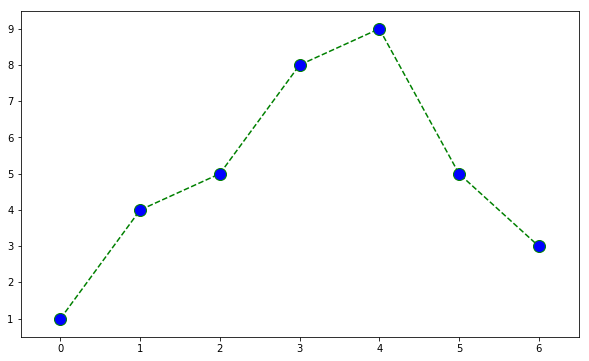

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12) # 마커 색상, 사이즈 지정

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [113]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

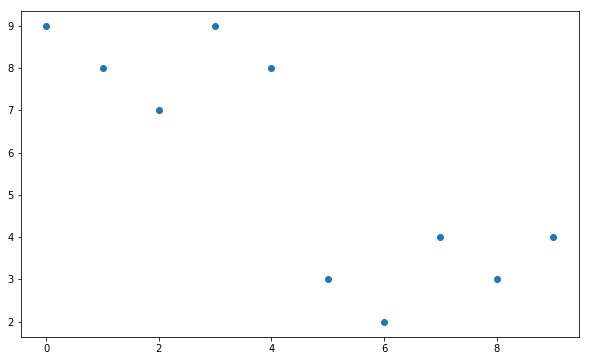

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(t,y) # 선 그리는 plot 명령 외에 scatter 명령은 점으로 표시
plt.show()

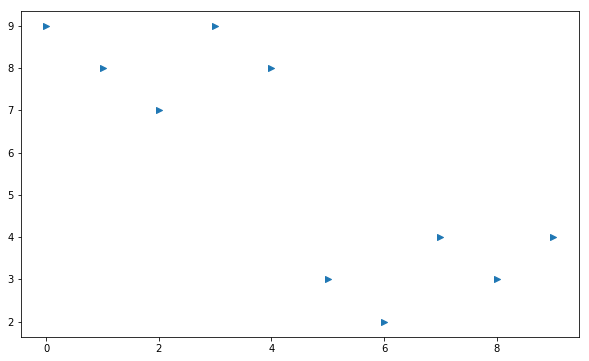

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>') # 마커 모양 지정
plt.show()

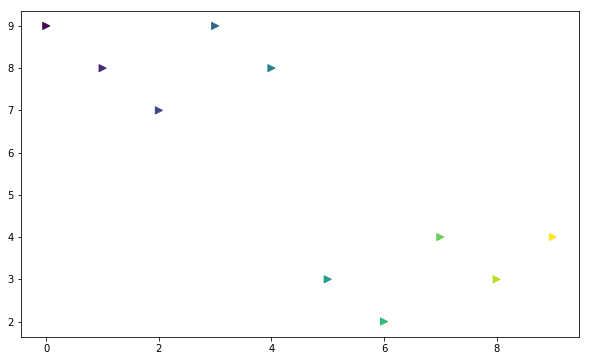

In [116]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>') # x 축값인 t에 따라 색상 버꾸는 color map 지정가능, s옵션은 마커의 크기
plt.show()

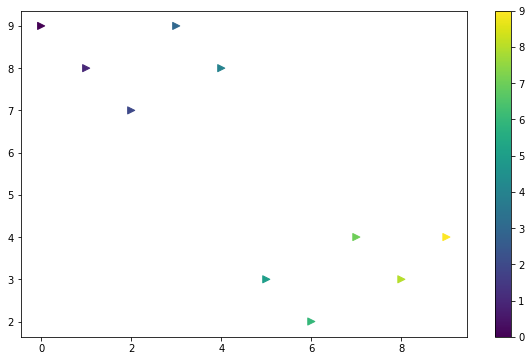

In [117]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [118]:
# numpy의 랜덤 함수를 이용해서 데이터 3개를 만든다.
# loc 옵션으로 평균값과 scale 옵션으로 표준편차를 지정
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

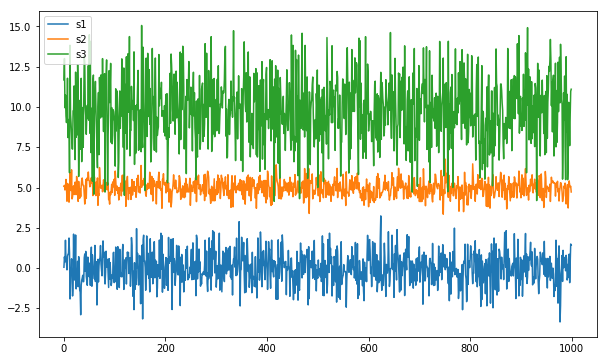

In [119]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

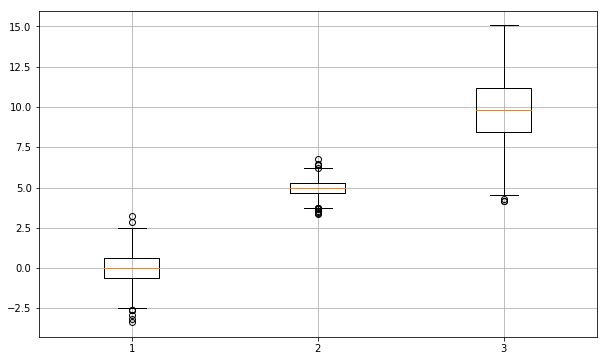

In [120]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3)) # boxplot으로 표현
plt.grid()
plt.show()

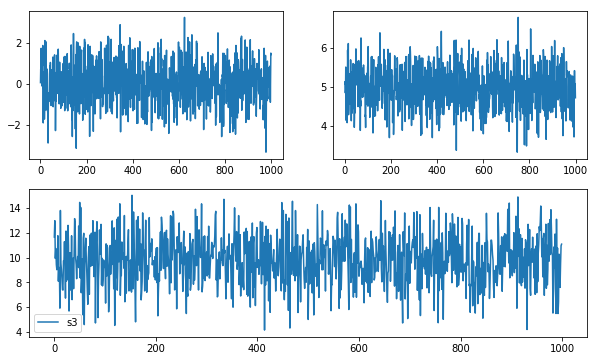

In [128]:
plt.figure(figsize=(10,6))

plt1 = plt.subplot(221)
plt2 = plt.subplot(222)
plt3 = plt.subplot(212)

plt1.plot(s1)
plt2.plot(s2)
plt3.plot(s3)

plt.show()

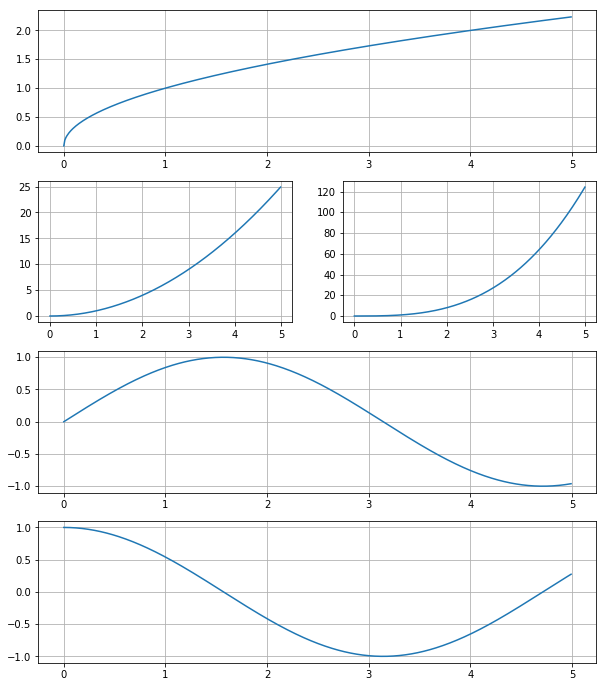

In [123]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t)) # 제곱근
plt.grid()

plt.subplot(423)
plt.plot(t,t**2) # 제곱근
plt.grid()

plt.subplot(424)
plt.plot(t,t**3) # 세제곱근
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t)) # 사인함수
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t)) # 코사인 함수
plt.grid()

plt.show()

# 1-8 CCTV와 인구현황 그래프로 분석하기

In [129]:
# 한글폰트 사용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': # 맥 OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # window
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [130]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


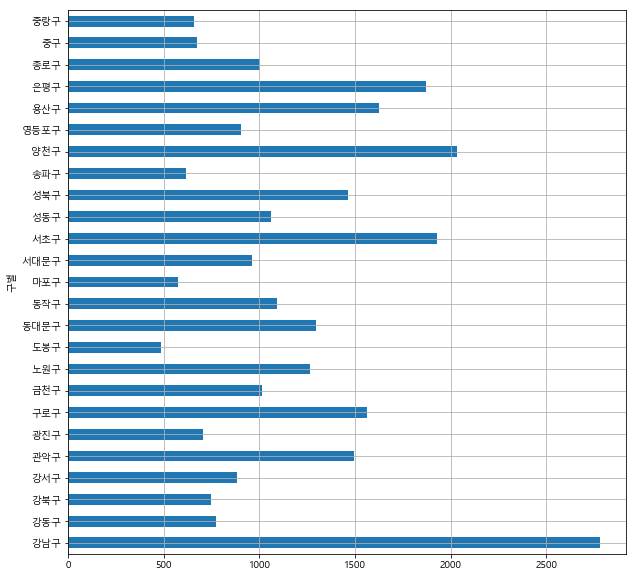

In [131]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10)) # pandas 데이터 뒤에 바로 plot 명령 붙임 가능, kind='barh'는 수평바
plt.show()

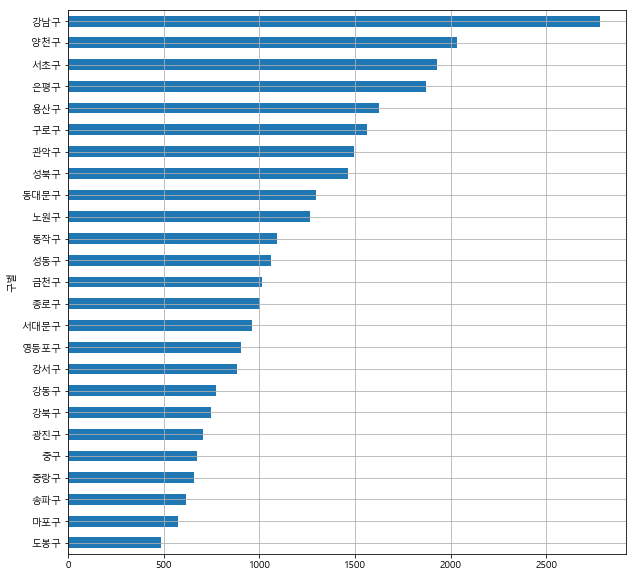

In [132]:
data_result['소계'].sort_values().plot(kind='barh', # 내림차순으로 정렬해준다.
                                     grid=True, figsize=(10,10))
plt.show()

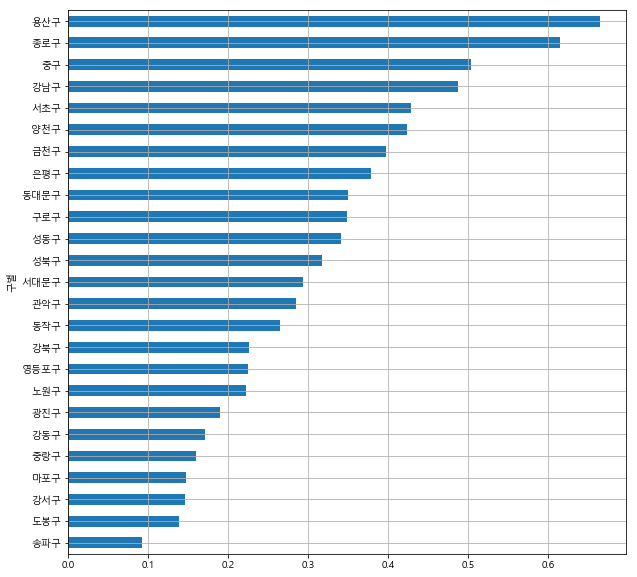

In [133]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100 # 인구대비 CCTV개수 비율을 계산하여 컬럼을 새로 만든다.

data_result['CCTV비율'].sort_values().plot(kind='barh', # 내림차순으로 CCTV비율을 정렬해준다.
                                         grid=True, figsize=(10,10))
plt.show()

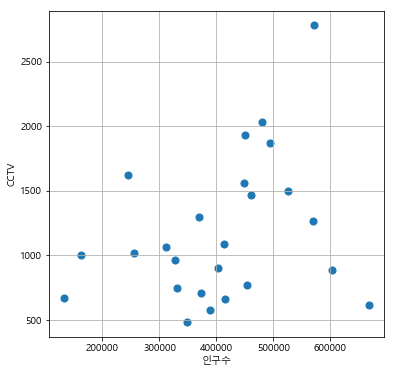

In [134]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50) # 마커 크기는 50
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

- 데이터를 대표하는 직선을 그림려준다. CCTV와 인구수는 양의 상관관계가 존재한다.

In [135]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) # numpy의 polyfit명령으로 1차원 직선을 만들어 준다.
fp1

array([1.30916415e-03, 6.45066497e+02])

In [136]:
f1 = np.poly1d(fp1) # poly1d로 y축 데이터 생성
fx = np.linspace(100000, 700000, 100) # linspace로 x축 데이터 생성 

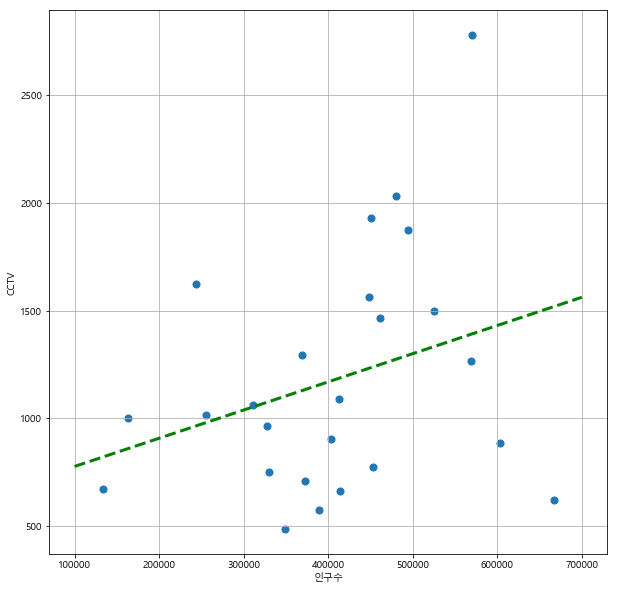

In [137]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50) # 마커 사이즈 50
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # 선 스타일은 점선, 선 굵기는3, 색은 green
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 1-9 좀 더 설득력 있는 자료 만들기

- 오차를 계산할 수 있는 코드를 만들고 데이터를 정렬한다.

In [138]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) # 1차원의 직선

f1 = np.poly1d(fp1) # y축
fx = np.linspace(100000, 700000, 100) # x축

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False) # '오차' 컬럼을 내림차순으로 정렬. (오차가 클수록 CCTV수 많음)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


- 텍스트와 color map 입혀준다.

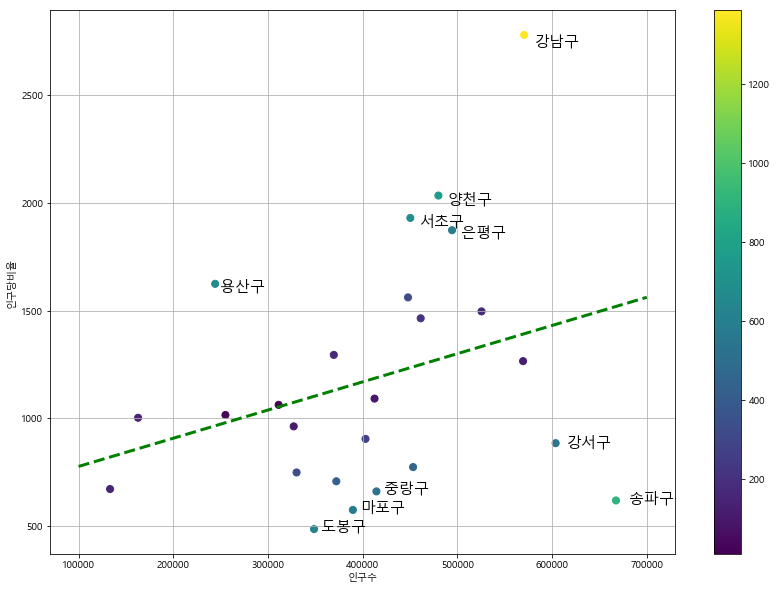

In [139]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50) # 오차범위에 color 지정
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,  # 텍스트를 붙여준다.
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

- 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
- 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다

- 강남구는 월등히 많은 CCTV가 설치되어있지만
- 송파구는 인구수에 비해 너무나도 적은 CCTV를 가지고 있다.